In [145]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [146]:
train_df = pd.read_csv('titanic/train.csv')

In [147]:
test_df = pd.read_csv('titanic/test.csv')

In [148]:
train_test_df = [train_df,test_df]

In [149]:
train_df.columns = map(str.lower, train_df.columns)

In [150]:
test_df.columns = map(str.lower, test_df.columns)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  418 non-null    int64  
 1   pclass       418 non-null    int64  
 2   name         418 non-null    object 
 3   sex          418 non-null    object 
 4   age          332 non-null    float64
 5   sibsp        418 non-null    int64  
 6   parch        418 non-null    int64  
 7   ticket       418 non-null    object 
 8   fare         417 non-null    float64
 9   cabin        91 non-null     object 
 10  embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [151]:
# cabin column has many null values. So, I am dropping the column.
train_df = train_df.drop('cabin',axis = 1)
test_df = test_df.drop('cabin',axis = 1)

In [152]:
train_df.shape, test_df.shape

((891, 11), (418, 10))

In [153]:
train_df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [154]:
train_test_df = [train_df,test_df]

In [155]:
# Bynarization. Converting sex column into integer by assigning 0 for female and 1 for male.
for dataset in train_test_df:
    dataset['sex'] = dataset['sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [156]:
train_df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


In [157]:
# We have null values in age column we need to fill those values with mean.
train_df['age'].fillna((train_df['age'].mean()), inplace=True)
test_df['age'].fillna((test_df['age'].mean()), inplace=True)
test_df['fare'].fillna((test_df['fare'].mean()), inplace=True)
train_test_df = [train_df,test_df]

In [158]:
# Age has values from 0 to 80. 
# So lets categorize the data into 0 to 8 values. For example like 0 to 10 it is categorized as 0 and so on.
for dataset in train_test_df:
    dataset.loc[ dataset['age'] <= 10, 'age'] = 0
    dataset.loc[(dataset['age'] > 10) & (dataset['age'] <= 20), 'age'] = 1
    dataset.loc[(dataset['age'] > 20) & (dataset['age'] <= 30), 'age'] = 2
    dataset.loc[(dataset['age'] > 30) & (dataset['age'] <= 40), 'age'] = 3
    dataset.loc[(dataset['age'] > 40) & (dataset['age'] <= 50), 'age'] = 4
    dataset.loc[(dataset['age'] > 50) & (dataset['age'] <= 60), 'age'] = 5
    dataset.loc[(dataset['age'] > 60) & (dataset['age'] <= 70), 'age'] = 6
    dataset.loc[ dataset['age'] > 70, 'age'] = 8

In [159]:
for dataset in train_test_df:
    dataset['age'] = dataset['age'].astype(int)

In [160]:
train_df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,2,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,2,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,3,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,3,0,0,373450,8.0500,S


In [161]:
train_df[['age', 'survived']].groupby(['age'], as_index=False).mean()

,age,survived
0,0,0.593750
1,1,0.382609
2,2,0.334152
3,3,0.445161
4,4,0.383721
5,5,0.404762
6,6,0.235294
7,8,0.200000


In [162]:
train_df[['embarked', 'survived']].groupby(['embarked'], as_index=False).mean()

,embarked,survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [163]:
# Lets remove the embarked, name, ticket and fare because these are not at all use full for training ml model. 
train_df = train_df.drop(['name','embarked','ticket'],axis = 1)
test_df = test_df.drop(['name','embarked','ticket'],axis = 1)
train_test_df = [train_df, test_df]
train_df.shape, test_df.shape

((891, 8), (418, 7))

In [164]:
train_df.head()

,passengerid,survived,pclass,sex,age,sibsp,parch,fare
0,1,0,3,0,2,1,0,7.2500
1,2,1,1,1,3,1,0,71.2833
2,3,1,3,1,2,0,0,7.9250
3,4,1,1,1,3,1,0,53.1000
4,5,0,3,0,3,0,0,8.0500


In [165]:
train_df.describe()

,passengerid,survived,pclass,sex,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,2.345679,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,1.338090,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,2.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,3.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,8.000000,8.000000,6.000000,512.329200


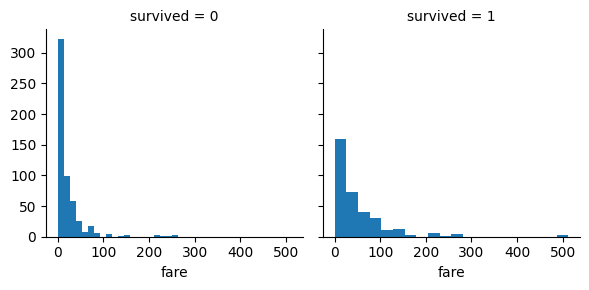

In [166]:
g = sns.FacetGrid(train_df, col='survived')
g.map(plt.hist, 'fare', bins=20)

In [167]:
train_df['FareBand'] = pd.qcut(train_df['fare'], 3)
train_df[['FareBand', 'survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,survived
0,"(-0.001, 8.662]",0.198052
1,"(8.662, 26.0]",0.402778
2,"(26.0, 512.329]",0.559322


In [168]:
for dataset in train_test_df:
    dataset.loc[ dataset['fare'] <= 8.662, 'fare'] = 0
    dataset.loc[(dataset['fare'] > 8.662) & (dataset['fare'] <= 26.0), 'fare'] = 1
    dataset.loc[ dataset['fare'] > 26.0, 'fare'] = 3
train_df = train_df.drop('FareBand', axis=1)

In [169]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   sex          891 non-null    int64  
 4   age          891 non-null    int64  
 5   sibsp        891 non-null    int64  
 6   parch        891 non-null    int64  
 7   fare         891 non-null    float64
dtypes: float64(1), int64(7)
memory usage: 55.8 KB


In [170]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  418 non-null    int64  
 1   pclass       418 non-null    int64  
 2   sex          418 non-null    int64  
 3   age          418 non-null    int64  
 4   sibsp        418 non-null    int64  
 5   parch        418 non-null    int64  
 6   fare         418 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 23.0 KB


In [171]:
# cabin column has many null values. So, I am dropping the column.
train_df = train_df.drop('passengerid',axis = 1)
test_df = test_df.drop('passengerid',axis = 1)
train_test_df = [train_df,test_df]

In [172]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    int64  
 3   age       891 non-null    int64  
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 48.9 KB


In [173]:
X_train = train_df.drop("survived", axis=1)
Y_train = train_df["survived"]
X_test  = test_df.copy()
X_train.shape, Y_train.shape, X_test.shape
features = X_train.columns

In [174]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [175]:
best_score = 0
best_md = 0
best_mln = 0
for md in (2,50):
    for mln in (3,200):
        decision_tree = DecisionTreeClassifier(max_depth=md,max_leaf_nodes = mln)
        decision_tree.fit(X_train, Y_train)
        Y_pred = decision_tree.predict(X_test)
        if decision_tree.score(X_train, Y_train) > best_score:
            best_score = decision_tree.score(X_train, Y_train)
            best_md = md
            best_mln = mln
best_score, best_md, best_mln

(0.8731762065095399, 50, 200)

In [176]:
decision_tree = DecisionTreeClassifier(max_depth = 50, max_leaf_nodes = 200)
decision_tree.fit(X_train, Y_train)
cvs = cross_val_score(decision_tree, X_train, Y_train, scoring="accuracy",cv=5)
print('Five fold cross validation for Decision tree is ' + str(cvs))
print('Average of five fold cross validation for decision tree is ' + str(cvs.mean()))

Five fold cross validation for Decision tree is [0.76536313 0.80337079 0.84269663 0.78651685 0.84831461]
Average of five fold cross validation for decision tree is 0.8092524009792228


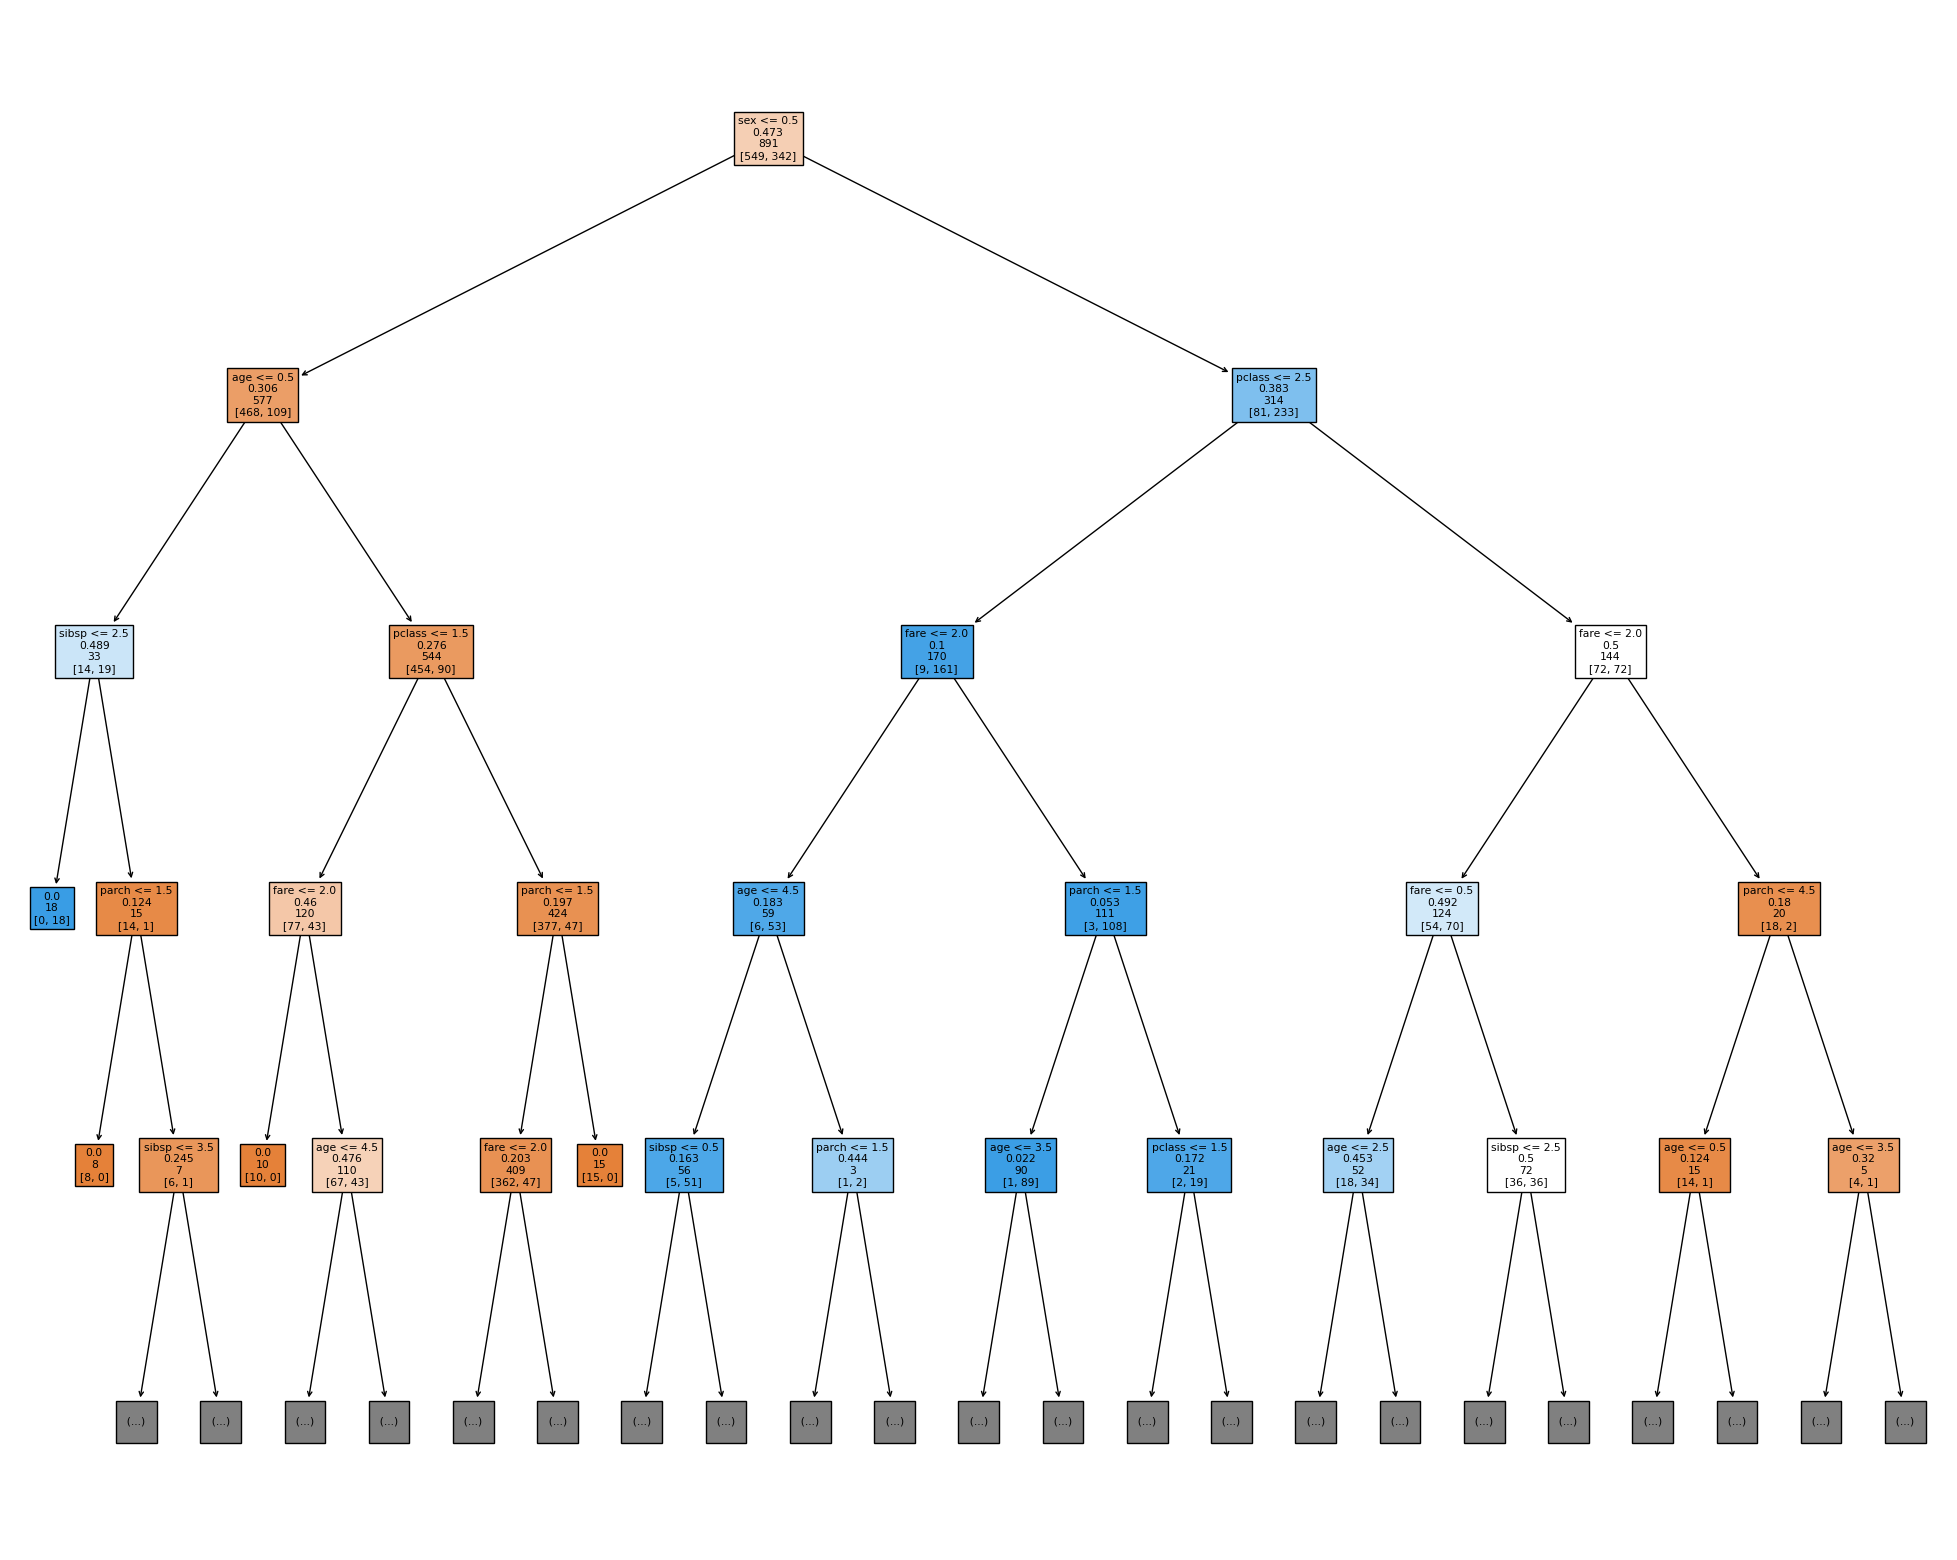

In [177]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(decision_tree,feature_names = features,label = all, filled = True, impurity = True, max_depth = 4)
fig.savefig("decistion_tree.png")

In [178]:
Y_pred = decision_tree.predict(X_test)
test_ans_df = pd.read_csv('titanic/gender_submission.csv')
test_pred_by_dt  = pd.DataFrame(columns=['PassengerId', 'prediction'])
test_pred_by_dt['prediction'] = Y_pred
test_pred_by_dt['PassengerId'] = test_ans_df['PassengerId']
test_result = pd.merge(test_ans_df,test_pred_by_dt,how = 'inner',on = 'PassengerId')
match_count = 0
total_count = 418
for index, row in test_result.iterrows():
    if row['Survived'] == row['prediction']:
        match_count = match_count + 1
print('Matching result of DecisionTree model with testing data is ' + str(((match_count)/total_count)*100))

Matching result of DecisionTree model with testing data is 83.25358851674642


In [179]:
param_grid = {
    'n_estimators':[10,50,100,150],
    'max_features':[2,3,5,6],
    'max_depth':[2,5,10,50,70],
    'max_leaf_nodes':[5,10,20,50]
}
param_grid

{'n_estimators': [10, 50, 100, 150],
 'max_features': [2, 3, 5, 6],
 'max_depth': [2, 5, 10, 50, 70],
 'max_leaf_nodes': [5, 10, 20, 50]}

In [180]:
# Random Forest
random_forest = RandomForestClassifier()
random_forest_tuning = GridSearchCV(random_forest, param_grid, cv=5)
random_forest_tuning.fit(X_train, Y_train)
print(random_forest_tuning.score(X_train, Y_train))
print(random_forest_tuning.best_params_)

0.835016835016835
{'max_depth': 5, 'max_features': 6, 'max_leaf_nodes': 10, 'n_estimators': 150}


In [181]:
random_forest = RandomForestClassifier(n_estimators = 150, max_depth = 50, max_leaf_nodes = 10, max_features = 3)
random_forest.fit(X_train, Y_train)
cvs = cross_val_score(random_forest, X_train, Y_train, scoring="accuracy",cv=5)
print('Five fold cross validation for Decision tree is ' + str(cvs))
print('Average of five fold cross validation for decision tree is ' + str(cvs.mean()))

Five fold cross validation for Decision tree is [0.82122905 0.8258427  0.8258427  0.79775281 0.84831461]
Average of five fold cross validation for decision tree is 0.8237963718536188


In [182]:
Y_pred = random_forest.predict(X_test)
Y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [183]:
test_pred_by_rf  = pd.DataFrame(columns=['PassengerId', 'prediction'])
test_pred_by_rf['prediction'] = Y_pred

In [184]:
test_pred_by_rf['PassengerId'] = test_ans_df['PassengerId']

In [185]:
test_result = pd.merge(test_ans_df,test_pred_by_rf,how = 'inner',on = 'PassengerId')

In [186]:
match_count = 0
total_count = 418
for index, row in test_result.iterrows():
    if row['Survived'] == row['prediction']:
        match_count = match_count + 1
print('Matching result of RandomForest model with testing data is ' + str(((match_count)/total_count)*100))

Matching result of RandomForest model with testing data is 95.21531100478468
